In [10]:
import numpy as np

# From scratch?

In [2]:
class RBM:
    def __init__(self, num_visible, num_hidden):
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.weights = np.random.normal(loc=0., scale=0.1, size=(num_visible, num_hidden))
        self.visible_bias = np.zeros(num_visible)
        self.hidden_bias = np.zeros(num_hidden)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def gibbs_sampling(self, visible_data):
        hidden_prob = self.sigmoid(np.dot(visible_data, self.weights) + self.hidden_bias)
        hidden_states = np.random.binomial(n=1, p=hidden_prob)
        visible_prob = self.sigmoid(np.dot(hidden_states, self.weights.T) + self.visible_bias)
        visible_states = np.random.binomial(n=1, p=visible_prob)
        return visible_states, hidden_states

    def train(self, data, learning_rate=0.1, epochs=10, batch_size=10):
        num_data = data.shape[0]
        for epoch in range(epochs):
            np.random.shuffle(data)
            for i in range(0, num_data, batch_size):
                batch = data[i:i+batch_size]
                visible_data = batch
                visible_state_0 = visible_data
                hidden_prob_0 = self.sigmoid(np.dot(visible_state_0, self.weights) + self.hidden_bias)
                hidden_state_0 = np.random.binomial(n=1, p=hidden_prob_0)
                visible_state_1, hidden_state_1 = self.gibbs_sampling(visible_state_0)

                delta_weights = np.dot(visible_state_0.T, hidden_prob_0) - np.dot(visible_state_1.T, hidden_state_1)
                delta_visible_bias = np.mean(visible_state_0 - visible_state_1, axis=0)
                delta_hidden_bias = np.mean(hidden_prob_0 - hidden_state_1, axis=0)

                self.weights += learning_rate * delta_weights
                self.visible_bias += learning_rate * delta_visible_bias
                self.hidden_bias += learning_rate * delta_hidden_bias

In [3]:
data = np.array([[1, 1, 0, 0],
                 [1, 0, 0, 0],
                 [0, 0, 1, 1],
                 [0, 0, 0, 1]])

num_visible = data.shape[1]
num_hidden = 2
rbm = RBM(num_visible, num_hidden)
rbm.train(data, epochs=1000)

print("Weights:")
print(rbm.weights)


Weights:
[[-5.26963084  5.55490442]
 [-4.06216367  1.28048002]
 [ 1.17244319 -4.71844563]
 [ 5.11854629 -5.06743021]]


# Using a library's implementation

In [4]:
from sklearn.neural_network import BernoulliRBM
import numpy as np

# Example data
data = np.array([[1, 1, 0, 0],
                 [1, 0, 0, 0],
                 [0, 0, 1, 1],
                 [0, 0, 0, 1]])

# Create and train RBM
rbm = BernoulliRBM(n_components=2, learning_rate=0.1, n_iter=100, random_state=42)
rbm.fit(data)

# Print learned parameters
print("Weights:")
print(rbm.components_)
print("\nVisible bias:")
print(rbm.intercept_visible_)
print("\nHidden bias:")
print(rbm.intercept_hidden_)


Weights:
[[-0.34945884 -0.45008024 -0.45323719 -0.32371892]
 [-0.35541693 -0.45146529 -0.44575243 -0.32784219]]

Visible bias:
[-1.325 -1.925 -1.875 -1.4  ]

Hidden bias:
[-2.52585871 -2.52573536]


# Example on MNIST

In [3]:
# Idea: MNIST represents numbers as 784 pixels that are either black or white.
# Let's say we focus on the number 3, can a RBM learn how to generate synthetic 3s?

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

y = y.astype(int)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [99]:
target_label = np.random.randint(0, 10)
X_filtered = X[y == target_label]

In [100]:
X_filtered

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
import matplotlib.pyplot as plt

def visualize_number(pixel_list):
    """
    Visualize a number from a list of pixel values.
    
    Args:
    - pixel_list (list): List of pixel values representing the image.
    
    Returns:
    - None
    """
    # Reshape pixel list into a 28x28 array (assuming MNIST-like images)
    image = np.array(pixel_list).reshape(28, 28)
    
    # Plot the image
    plt.imshow(image, cmap='binary')
    plt.axis('off')  # Hide axis
    plt.show()


In [102]:
# visualize_number(X_filtered.iloc[0])

In [132]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

rbm = BernoulliRBM(n_components=256, learning_rate=0.1, n_iter=20, random_state=42, verbose=True)
scaler = MinMaxScaler()
rbm_pipeline = Pipeline(steps=[('scaler', scaler), ('rbm', rbm)])

rbm_pipeline.fit(X_filtered)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -153.19, time = 2.10s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -133.81, time = 2.52s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -132.58, time = 2.23s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -121.13, time = 2.19s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -117.75, time = 2.49s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -116.54, time = 2.39s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -114.92, time = 2.55s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -112.97, time = 2.39s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -117.66, time = 2.42s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -110.89, time = 2.34s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -119.79, time = 3.11s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -106.52, time = 2.54s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -117.34, time = 2.35s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -111.02, time = 3.09s
[BernoulliRBM] 

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rbm',
                 BernoulliRBM(n_iter=20, random_state=42, verbose=True))])

In [133]:
def generate_synthetic_samples(rbm, n_samples=1, n_gibbs_steps=100):
    """
    Generate synthetic samples using Gibbs sampling.

    Parameters:
    - rbm: BernoulliRBM
        Trained RBM model.
    - n_samples: int
        Number of synthetic samples to generate.
    - n_gibbs_steps: int
        Number of Gibbs sampling steps to perform.

    Returns:
    - synthetic_samples: ndarray
        Array of shape (n_samples, n_features) containing synthetic samples.
    """
    synthetic_samples = np.random.rand(n_samples, rbm.n_features_in_) < 0.5  # Initialize with random binary values

    for _ in range(n_gibbs_steps):
        synthetic_samples = rbm.gibbs(synthetic_samples)

    return synthetic_samples

In [134]:
n_samples_to_generate = 25
synthetic_samples = generate_synthetic_samples(rbm_pipeline.named_steps['rbm'], n_samples=n_samples_to_generate)

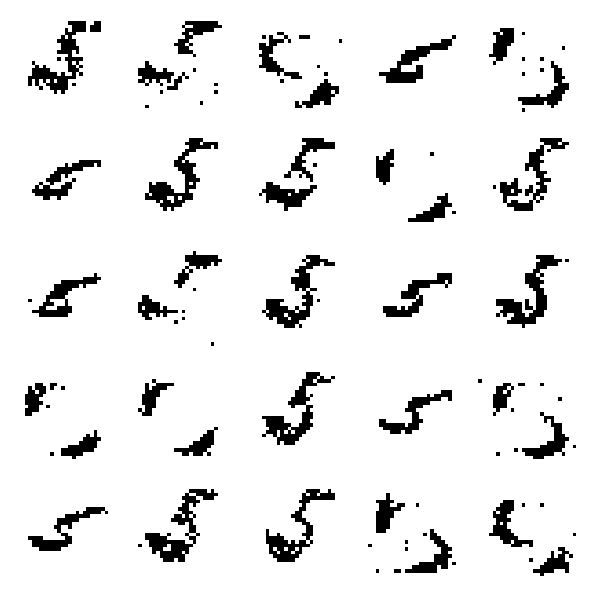

In [135]:
n_rows, n_cols = 5, 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(synthetic_samples[i].reshape(28, 28), cmap='binary')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [136]:
target_label

5